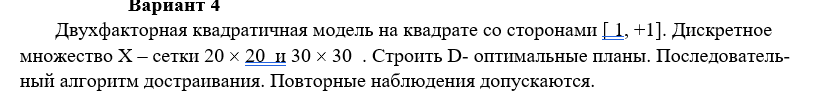

Модель остается той же

In [1]:
%precision 3

'%.3f'

In [ ]:
#импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [ ]:
#изначальные параметры
m = 6#количество неизвестных параметров
n =400#для сетки 20х20 изначальное количество точек(почему это определяется как разм_стеки х разм_сетки хз)
# для сетки 30х30 изначальное количество точек будет рано 900
N_list = [20, 25, 30, 35, 40]#для такой размерности нужно делать
grid_size_list = [20,30]# размерность сеток списком

In [ ]:
# наша функция
def func(x1, x2):
    return np.array([1, x1, x2, x1*x2, x1**2, x2**2])

Итак, теперь итог на сейчашный момент: я запуталась, что мы подаем изначально, и что вообще происходит, как считать

In [ ]:
#Информационная матрица
def M_calc(x,p):
    M = np.zeros((m, m))
    for i in range(n):
        M += p[i] * (func(x[i][0], x[i][1]) @ func(x[i][0], x[i][1]).T)
    return M

In [ ]:
#Дисперсионная матрица
def D_calc(x,p):
    return np.linalg.inv(M_calc(x,p))

In [ ]:
def our_algoritm(grid_size):
    #создаем по 20(30) точек в этом отрезке
    x1 = np.linspace(-1,1,grid_size)
    x2 = np.linspace(-1,1,grid_size)
    #для создания в целом квадрата точек
    X1, X2 = np.meshgrid(x1, x2)#матрицы, где каждая строка копия x1(x2)
    X = np.column_stack([X1.ravel(), X2.ravel()])#преобразе матрицы в вектора, и выводим координаты

    return X

res = our_algoritm(5)
print(res)

[[-1.  -1. ]
 [-0.5 -1. ]
 [ 0.  -1. ]
 [ 0.5 -1. ]
 [ 1.  -1. ]
 [-1.  -0.5]
 [-0.5 -0.5]
 [ 0.  -0.5]
 [ 0.5 -0.5]
 [ 1.  -0.5]
 [-1.   0. ]
 [-0.5  0. ]
 [ 0.   0. ]
 [ 0.5  0. ]
 [ 1.   0. ]
 [-1.   0.5]
 [-0.5  0.5]
 [ 0.   0.5]
 [ 0.5  0.5]
 [ 1.   0.5]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]]
